# Running oxDNA Analyses using OAT 

The oxDNA analysis tools have been bundled up into a Python library. Some of the scripted calls work, and in some places I am reverting to the CLI version of the tools. The tools I want to use are:

* plot energy -- done
* RMSF analysis -- done
* bond analysis -- done
* PCA -- done
* clustering -- done

In [1]:
from oxDNA_analysis_tools.bond_analysis import bond_analysis
from oxDNA_analysis_tools.mean import mean
from oxDNA_analysis_tools.deviations import deviations
from oxDNA_analysis_tools.deviations import output
from oxDNA_analysis_tools.pca import pca

# all functions required to read a configuration using the new RyeReader
from oxDNA_analysis_tools.UTILS.RyeReader import describe, get_confs, inbox

# the function used to visualize a configuration in oxView
from oxDNA_analysis_tools.UTILS.oxview import oxdna_conf

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mydir = "/home/emma/Documents/research/gnn-dna/dsdna-dataset/t1"
top = os.path.join(mydir, "sim_out/top.top") 
traj = os.path.join(mydir, "sim_out/trajectory_sim.dat")
input_file = "/home/emma/repos/gnn-dna-sim/src/dataset-generation/dsDNA/input_sim"

# RyeReader uses indexing allows for random access in the trajectory
top_info, traj_info = describe(top, traj)
print(top_info)

TopInfo(path='/home/emma/Documents/research/gnn-dna/dsdna-dataset/t1/sim_out/top.top', nbases=40)


## Energy Plot


Text(0, 0.5, 'Total Energy [e-20 J]')

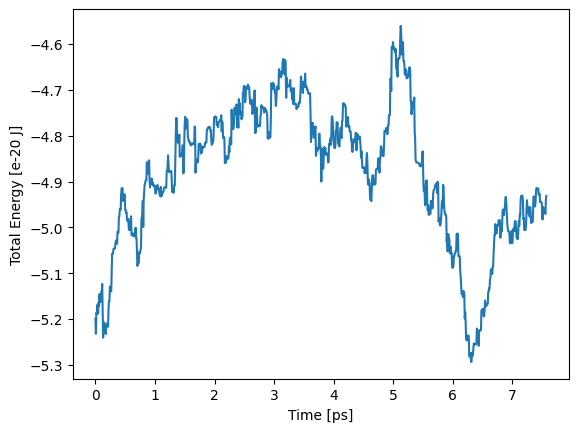

In [2]:
# read in first and last columns
energy_file = "/home/emma/Documents/research/gnn-dna/dsdna-dataset/t1/sim_out/energy_sim.dat"

data = np.genfromtxt(energy_file, delimiter='  ')

# convert first column to time
dt = 0.005 # assuming this will be true for all simulations
time = data[:,0] * dt * 3.03 # 3.03 ps = 1 unit of time in oxdna

# convert last column to energy
# for MD sims the energy file has the following format:
# [time (steps * dt)]	[potential energy]	[kinetic energy]	[total energy]
total_energy = data[:,3] * 4.142 # e-20 J

# plot data
plt.figure()
plt.plot(time, total_energy)
plt.xlabel("Time [ps]")
plt.ylabel("Total Energy [e-20 J]")
# plt.savefig("{}/energy.png".format(output_dir))

## RMSD / RMSF Analysis

INFO: Processing in blocks of 20 configurations
INFO: You can modify this number by running oat config -n <number>, which will be persistent between analyses.


Starting up 4 processes for 50 chunks
All spawned, waiting for results
Starting up 4 processes for 50 chunks
All spawned, waiting for results


INFO: Processing in blocks of 20 configurations
INFO: You can modify this number by running oat config -n <number>, which will be persistent between analyses.
INFO: writing deviations to /home/emma/Documents/research/gnn-dna/dsdna-dataset/t1/sim_out/devs.json


INFO: writing RMSDs to oxView order parameter file, /home/emma/Documents/research/gnn-dna/dsdna-dataset/t1/sim_out/rmsd_op.json
INFO: writing RMSD plot to /home/emma/Documents/research/gnn-dna/dsdna-dataset/t1/sim_out/rmsd.png


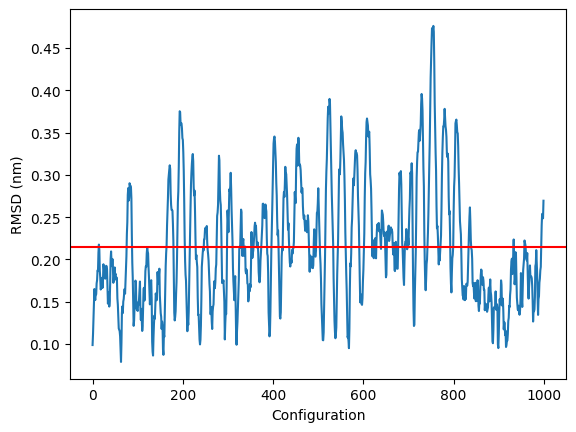

In [4]:
# Compute the mean structure and RMSFs
mean_conf = mean(traj_info, top_info, ncpus=4)
RMSDs, RMSFs = deviations(traj_info, top_info, mean_conf, ncpus=4)
outfile = os.path.join(mydir, "sim_out/devs.json")
rmsd_plot_name = os.path.join(mydir, "sim_out/rmsd.png")
rmsd_data_file = os.path.join(mydir, "sim_out/rmsd_op.json")
output(RMSDs, RMSFs, outfile, rmsd_plot_name, rmsd_data_file)

#They come out as numpy arrays, need to be a dict with a list for visualization
RMSFs = {"RMSF": RMSFs.tolist()}

In [1]:
# Display python objects in an oxview iframe
oxdna_conf(top_info, mean_conf, RMSFs)

NameError: name 'oxdna_conf' is not defined

## Bond Analysis

The command line seems to be working but not the scripted call for some reason...

In [12]:
# !pwd
# !oat generate_force -o ./forces.txt -f ./pairs.txt input_sim conf.dat # don't use this

# forces2pairs -o <output_file> <force file>
# !oat forces2pairs -o pairs.txt external_forces.txt

# bond_analysis (-p <n_cpus>) <input> <trajectory> <designed_pairs_file> <output_file>
# !oat bond_analysis -p 4 /home/emma/Documents/research/gnn-dna/dsdna-dataset/t1/input_sim traj_info 
!oat bond_analysis /home/emma/Documents/research/gnn-dna/dsdna-dataset/t1/input_sim /home/emma/Documents/research/gnn-dna/dsdna-dataset/t1/sim_out/trajectory_sim.dat /home/emma/Documents/research/gnn-dna/dsdna-dataset/t1/pairs.txt /home/emma/Documents/research/gnn-dna/dsdna-dataset/t1/sim_out/bonds.json

INFO: oxDNA_analysis_tools version: 2.0.3
INFO: running config.py installed at:  /home/emma/.local/lib/python3.10/site-packages/oxDNA_analysis_tools/config.py
INFO: Python version: 3.10.4
INFO: Package Numpy found. Version: 1.23.2
INFO: No dependency issues found.
INFO: Processing in blocks of 20 configurations
INFO: You can modify this number by running oat config -n <number>, which will be persistent between analyses.
Starting up 1 processes for 50 chunks
All spawned, waiting for results
INFO: The generator will try to take into account bonded interactions by choosing distances between bonded neighbours no larger than 2.000000
INFO: Converting temperature from Kelvin (300.000000 K) to simulation units (0.100000)
INFO: Using a maximum backbone force of 10  (the corresponding mbf_xmax is 0.169258) and a far value of 1
INFO: Running Debye-Huckel at salt concentration =  0.5
INFO: Using different widths for major and minor grooves
INFO: No order parameters file specified in input file; p

In [11]:
# bond_analysis(traj_info, top_info, pairs="/home/emma/Documents/research/gnn-dna/dsdna-dataset/t1/sim_out/pairs.txt", inputfile="/home/emma/Documents/research/gnn-dna/dsdna-dataset/t1/sim_out/input_sim", ncpus=2)

Starting up 2 processes for 50 chunks
All spawned, waiting for results


INFO: Processing in blocks of 20 configurations
INFO: You can modify this number by running oat config -n <number>, which will be persistent between analyses.
INFO: The generator will try to take into account bonded interactions by choosing distances between bonded neighbours no larger than 2.000000
INFO: Converting temperature from Kelvin (300.000000 K) to simulation units (0.100000)
INFO: Using a maximum backbone force of 10  (the corresponding mbf_xmax is 0.169258) and a far value of 1
INFO: Running Debye-Huckel at salt concentration =  0.5
INFO: Using different widths for major and minor grooves
INFO: No order parameters file specified in input file; printing indices of any particle pairs that have a hydrogen bond between them
DEBUG: Debye-Huckel parameters: Q=0.054300, lambda_0=0.361646, lambda=0.511444, r_high=1.534332, cutoff=3.264295
DEBUG: Debye-Huckel parameters: debye_huckel_RC=2.301498e+00, debye_huckel_B=2.993770e-03
INFO: The Debye length at this temperature and salt conc

AttributeError: 'str' object has no attribute 'keys'

ied in input file; printing indices of any particle pairs that have a hydrogen bond between them
DEBUG: Debye-Huckel parameters: Q=0.054300, lambda_0=0.361646, lambda=0.511444, r_high=1.534332, cutoff=3.264295
DEBUG: Debye-Huckel parameters: debye_huckel_RC=2.301498e+00, debye_huckel_B=2.993770e-03
INFO: The Debye length at this temperature and salt concentration is 0.511444
INFO: (Cells.cpp) N_cells_side: 5, 5, 5; rcut=3.2643, IS_MC: 0
INFO: N: 40, N molecules: 2

Please cite these publications for any work that uses the oxDNA simulation package
		- for the code:
			* P. Šulc et al., J. Chem. Phys. 137, 135101 (2012)
			* L. Rovigatti et al., J. Comput. Chem. 36, 1 (2015)
		- for the oxDNA model:
			* T. E. Ouldridge et al., J. Chem. Phys, 134, 085101 (2011)
		- for the oxDNA2 model:
			* B. E. K. Snodin et al., J. Chem. Phys. 142, 234901 (2015)
		- for the oxRNA model:
			* P. Šulc et al., J. Chem. Phys. 140, 235102 (2014)
INFO: Aggregated I/O statistics (set debug=1 for file-wise in

## PCA Analysis

There is a scripted version of the PCA analysis but I don't know what to do with the outputs, which are numpy arrays.

Instead we can use the CLI version. In this case we need to get the mean configuration first as shown below. 

The PCA tool returns:

* coordinates2.png
* scree.png
* pca0.json (these are the arrow overlays you can use on your oxView visualization. There may be more than one set of principal components, and you may find that the arrows are small)

In [14]:
# structure, eigenvalues, eigenvectors = pca(traj_info, top_info, mean_conf, ncpus=4)

In [ ]:
!oat mean -h

In [ ]:
!oat mean -p 4 -o /home/emma/Documents/research/gnn-dna/dsdna-dataset/t1/sim_out/mean.dat /home/emma/Documents/research/gnn-dna/dsdna-dataset/t1/sim_out/trajectory_sim.dat 

In [ ]:
!oat pca -p 4 /home/emma/Documents/research/gnn-dna/dsdna-dataset/t1/sim_out/trajectory_sim.dat /home/emma/Documents/research/gnn-dna/dsdna-dataset/t1/sim_out/mean.dat /home/emma/Documents/research/gnn-dna/dsdna-dataset/t1/sim_out/pca.json

## Clustering

Clustering can be run on its own but you can also call it from the PCA command. The outputs are:

* cluster_data.json (which is also the serialized_data input as shown below)
* cluster_0.dat (this is the configuration of the first cluster, there may be more than 1)
* centroid_0.dat
* animated.mp4

In [ ]:
!oat clustering -h

In [ ]:
!oat clustering /home/emma/Documents/research/gnn-dna/dsdna-dataset/t1/sim_out/cluster_data.json